In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [2]:
x = np.fromfile('/home/daniel/aoa_graves.2xc64', dtype = 'complex64').reshape((-1,2))

In [3]:
fs = 1000

In [4]:
average = fs//10
corr = x[:,0] * np.conj(x[:,1])
(1e6*corr).astype('complex64').tofile('/tmp/corr.c64')
corr = np.sum(corr[:corr.size//average*average].reshape((-1,average)), axis = 1)

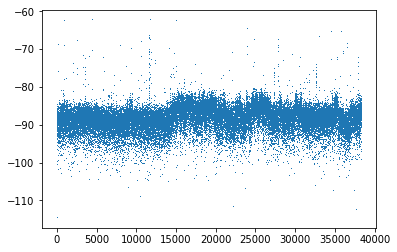

In [5]:
plt.plot(10*np.log10(np.abs(corr)), ',')

In [6]:
def spectrum_plot(ax, x):
    f, t, Sxx = scipy.signal.spectrogram(x, fs, return_onesided=False)
    f = np.fft.fftshift(f)
    ax.imshow(np.fft.fftshift(np.log10(Sxx), axes=0), extent = [t[0],t[-1],f[-1],f[0]], aspect='auto', cmap='viridis', vmax = -9, vmin = -13)

In [7]:
n_secs = 100
for j,start in enumerate(range(0, x.shape[0], fs * n_secs)):
    fig, ax1 = plt.subplots(figsize = (15,4))
    spectrum_plot(ax1, x[start:start+fs*n_secs,0])
    ax2 = ax1.twinx()
    az = np.rad2deg(np.angle(corr[start//average:(start+fs*n_secs)//average]))
    ax2.plot(np.arange(az.size)/(fs//average), az, '.', color = 'red')
    ax2.set_ylim([-180, 180])
    ax1.set_ylim([-150, 150])
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Freq (Hz)')
    ax2.set_ylabel('Phase (deg)', color = 'red')
    fig.savefig(f'/tmp/plot_graves_{j:03d}')
    plt.close()